# Исследование факторов влияющих на стоимость недвижимости

**Цель исследования** — проверить  гипотезы:
1. Влияние количества комнат на цену.
2. Влияние площади на цену.
3. Влияние этажности на цену. 
4. Влияние удаленности от центра на цену недвижимости.
5. Влияние даты размещения на цену.
6. Оценить разницу влияющих факторов ценообразования Санкт-Петербурга и остальных населенных пунктов. 

**Ход исследования**

Данные о объектах недвижимости находятся в файле `/datasets/real_estate_data.csv`. О качестве данных ничего не известно. Поэтому понадобится обзор данных. 

Исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.


## Обзор данных

In [1]:
import pandas as pd # импорт библиотеки pandas

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv',sep ='\t')# чтение файла с данными и сохранение в df

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца.

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м).
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images`— число фотографий квартиры в объявлении. Целочисленый тип данных.

На первый взгляд  в данных есть некоторые особенности:
1. Отсутствует змеиный регист в названии столбца cityCenters_nearest.
2. Большое количество пропусков в катетории `ceiling_height`(возможно причина в стандартной высоте).



## Предобработка данных

Приведение к общему стилю названий столбцов.

In [5]:
df=df.rename(columns={'cityCenters_nearest':'city_centers_nearest'}) # переименование столбца

In [6]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')

### Поиск дубликатов

Проверка на неявные дубликаты.

In [7]:
if len(df['locality_name'].unique()) == len(df['locality_name'].str.lower().unique()):
    print('Нет ошибок с регистром в названии населенных пунктов')
else:
    df['locality_name'] = df['locality_name'].str.lower()

Нет ошибок с регистром в названии населенных пунктов


Проверка наличия явных  дубликатов.

In [8]:
df.duplicated().sum()

0

Нахождение дубликатов по трем категориям

In [9]:
list_duplicates = []

list_duplicates = (df[['last_price','living_area','first_day_exposition']]
                   .duplicated()
                   .to_frame()
                   .rename(columns = {0:'duplicates'})
                   .query('duplicates == True').index)  

len(list_duplicates)

56

Удаление дубликатов по трем категориям

In [10]:
df = df.drop(index = list_duplicates).reset_index(drop = True)

### Обработка пропусков  и выбросов

Просмотр цены объеков 

In [11]:
df['last_price'].describe()

count    2.364300e+04
mean     6.548030e+06
std      1.089876e+07
min      1.219000e+04
25%      3.420000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Удаление объектов с неправдаподобно низкой стоимостью 

In [12]:
df = df.query('last_price > 100000')

Пропуски во всех категориях

In [13]:
df.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9170
floors_total               86
living_area              1880
floor                       0
is_apartment            20869
studio                      0
open_plan                   0
kitchen_area             2256
balcony                 11478
locality_name              49
airports_nearest         5521
city_centers_nearest     5498
parks_around3000         5497
parks_nearest           15578
ponds_around3000         5497
ponds_nearest           14550
days_exposition          3171
dtype: int64

Доля пропусков для каждой категории (в процентах):

In [14]:
list_ratio_nan =[]
for column in df.columns:
    list_ratio_nan.append(df[column].isna().sum()*100/ len(df[column]))
ratio_nan = pd.Series(list_ratio_nan, index=df.columns)
ratio_nan

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.786905
floors_total             0.363759
living_area              7.951950
floor                    0.000000
is_apartment            88.270874
studio                   0.000000
open_plan                0.000000
kitchen_area             9.542340
balcony                 48.549192
locality_name            0.207258
airports_nearest        23.352508
city_centers_nearest    23.255224
parks_around3000        23.250994
parks_nearest           65.891211
ponds_around3000        23.250994
ponds_nearest           61.543017
days_exposition         13.412571
dtype: float64

Есть пропуски в категориях, которые составляют значительную часть выборки (их невозможно удалить без влияния на конечный результат исследования). Категории пропуски в которых составляют незначительную часть можно удалить.

In [15]:
# check
# пропущенные значения бары

def pass_value(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = False)
        .plot(kind= 'bar', figsize=(19,4), rot = 10)
        .set_title('Кол-во пропусков в датасете ...' + '\n')
    );

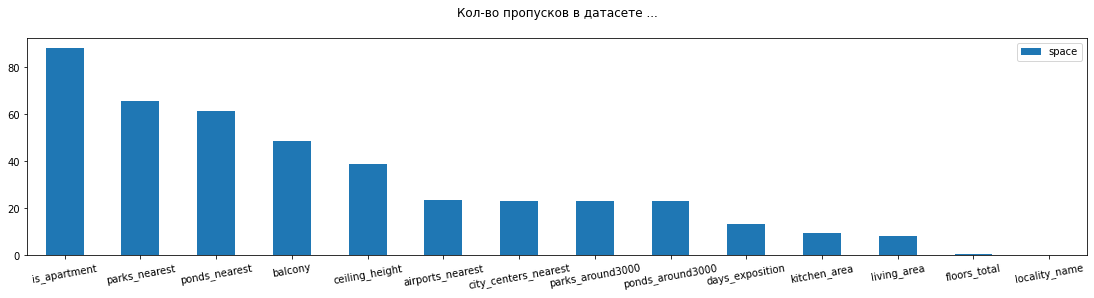

In [16]:
pass_value(df)

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br /> Наглядность представления информации один из важных аспектов работы дата-аналитика или дата-сайентиста
    
Функцию можно разломать на кусочки ☝ и собрать заново, чтобы научиться, какая команда, за что отвечает, многое тебе уже знакомо

In [17]:
# check
# пропущенные значения бары

def pass_value1(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'percentage'})
        .query('percentage > 0')
        .sort_values(by = 'percentage', ascending = False)
        .plot(kind= 'bar', figsize=(19,4), rot = 10)
        .set_title('Доля пропусков в датасете недвижимости Санкт-Петербурга и области' + '\n')
    );

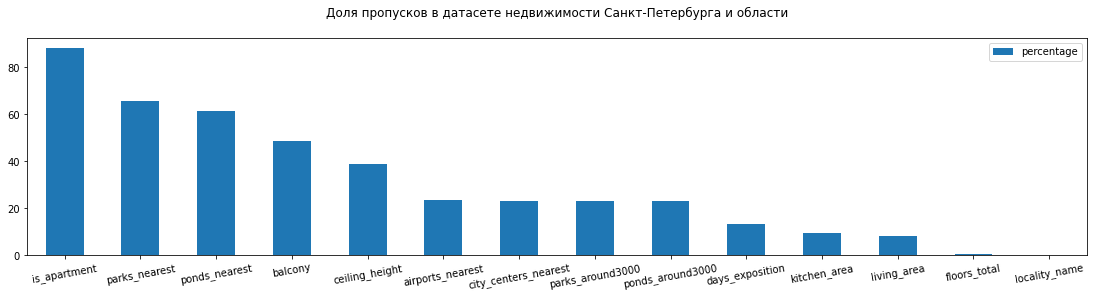

In [18]:
pass_value1(df)

#### Обработка пропусков `ceiling_height` (высота потолков).

Характеристики категории.

In [19]:
df['ceiling_height'].describe()

count    14472.000000
mean         2.771735
std          1.262397
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Среднее значение незначительно отличается от медианного.

<AxesSubplot:>

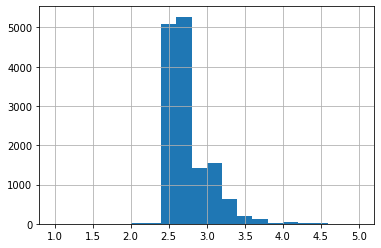

In [20]:
df['ceiling_height'].hist(bins=20,range = (1,5))

Значения сконцентрированы вокруг высоты 2.5 метра.

Удаление объектов с неправдаподобными значениями высоты потолка.

In [21]:
df = df.query('2 < ceiling_height < 10 or ceiling_height.isna()').reset_index(drop = True)

#### Обработка пропусков в `floors_total` (количестве этажей)

Характеристики категории.

In [22]:
df['floors_total'].describe()

count    23517.000000
mean        10.678020
std          6.595234
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Обзор объектов

In [23]:
df[df['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
456,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
669,4,6051191.0,93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1754,5,3600000.0,39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1927,1,9750000.0,66.77,2016-05-13T00:00:00,2,NaN,NaN,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2389,7,5395770.0,53.00,2017-06-29T00:00:00,2,NaN,NaN,29.00,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2841,4,2325000.0,27.80,2016-09-21T00:00:00,1,NaN,NaN,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2947,10,6500000.0,54.30,2019-04-23T00:00:00,1,NaN,NaN,22.20,6,NaN,...,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3026,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


<AxesSubplot:>

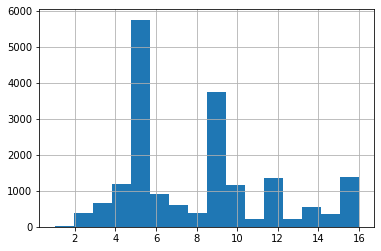

In [24]:
df['floors_total'].hist(bins=16,range=(1,16))

Здания в 5 этажей наиболее часто встречающееся значения.

In [25]:
df['floors_total'].mode()

0    5.0
dtype: float64

Проверка условия что этаж объекта не выше количества общих этажей в здании

In [26]:
count = 0
for element  in df['floors_total'] >= df['floor']:
    if element == False:
        count+=1
print(count-df['floors_total'].isna().sum())   

0


In [27]:
df.query('floors_total < floor').sum().sum()

0.0

В исходном датасете нет объектов  этаж которых больше здания в котором он расположен

Количество объектов в которых этаж объекта больше общего количества этажей.

Проверка на пропуски с условием замены на моду в количестве этажей

In [28]:
count = 0
for element  in df['floors_total'].fillna(int(df['floors_total'].mode())) >= df['floor']:
    if element == False:
        count+=1
print(df['floors_total'].isna().sum() - count)  # количестов замен в пропусках, которые соответствуют условию     

23


In [29]:
df['floors_total'].isna().sum()

86

Примерно 2/3 замененных пропусков не соответствуют условию - общее количество этажей больше этажности объекта

Количество пропусков в категории менее 1%, поэтому удаление такого количества не приведет к существенному влиянию 

In [30]:
df=df.dropna(subset =['floors_total'])

#### Анализ пропусков категории нежилые помещения `is_apartment`

Обзор категории.

In [31]:
df.groupby('is_apartment')['total_images'].count()

is_apartment
False    2713
True       47
Name: total_images, dtype: int64

 `is_apartment` делит все объекты на две группы - нежилые помещения с условиями для проживания и без условий.
 Но нет третьей категории - жилые помещения.

Добавим третью категорию вместо пропусков и преобразуем булев тип в целочисленный.

In [32]:
df['is_apartment'] = df['is_apartment'].fillna(2)
df['is_apartment'] = df['is_apartment'].astype('int')
df['is_apartment'].isna().sum()

0

#### Анализ пропусков  в  `living_area` (жилой площади)

Обзор категории.

In [33]:
df['living_area'].describe()

count    21672.000000
mean        34.483972
std         22.058997
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Жилая площадь в среднем будет зависеть одинаково от общей площади.  

Поиск этого соотношения и замена пропусков с учетом найденного коэффициента.

In [34]:
ratio_living_area = df['living_area'].mean() / df['total_area'].mean()

df['living_area'] = df['living_area'].fillna(df['total_area']*ratio_living_area)
df['living_area'].isna().sum()

0

#### Анализ пропусков в  'kitchen_area'

Обзор категории

In [35]:
df['kitchen_area'].describe()

count    21315.000000
mean        10.567421
std          5.907014
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Большинство объектов - обычные квартиры. 

Обзор пропущенных кухонь по общей площади. 

In [36]:
df.query('kitchen_area.isna()')['total_area'].describe()

count    2202.000000
mean       56.772293
std        41.296100
min        12.000000
25%        34.000000
50%        46.000000
75%        65.000000
max       500.000000
Name: total_area, dtype: float64

Проверка связи пропусков с планировкой. 

In [37]:
df[df['kitchen_area'].isna()].groupby('open_plan')['total_images'].count()

open_plan
False    2136
True       66
Name: total_images, dtype: int64

Большинство пропусков в объектах с обычной планировкой.

In [38]:
count = 0
for element  in (df['living_area'] + df['kitchen_area']) < df['total_area'] * 0.9:
    if element == False:
        count+=1
print(count)      

2710


In [39]:
df.query('living_area + kitchen_area > total_area*0.9')['kitchen_area'].count()

495

In [40]:
df.query('living_area + kitchen_area > total_area*0.9 and kitchen_area.isna()')['kitchen_area'].count()

0

Если большинстово объектов это обычные квартиры, то площадь кухни будет зависеть от общей площади.

In [41]:
ratio_kitchen_area = df['kitchen_area'].mean() / df['total_area'].mean()

kitchen_area_for_fillna = df[df['kitchen_area'].isna()]['total_area']*ratio_kitchen_area


Количество объектов, несоответствующих условию сумма площади жилой зоны и кухни меньше 90% общей площади в исходном датасете

In [42]:
count = 0
for element  in ((df['living_area'] + df['kitchen_area']) > (df['total_area']*0.9 )):
    if element == True:
        count+=1
print(count)      

495


In [43]:
df.query('(living_area + kitchen_area) > total_area * 0.9')['kitchen_area'].count()

495

Общее количество пропусков в категории

In [44]:
df['kitchen_area'].isna().sum()

2202

Количество объектов, несоответствующих условию сумма площади жилой зоны и кухни меньше 90% общей площади в датасете после заполнения пропусков

In [45]:
count = 0
for element  in (df['living_area'] +  df['kitchen_area'].fillna(kitchen_area_for_fillna)) < df['total_area'] * 0.9:
    if element == False:
        count+=1
print(count)      

653


Количество таких обектов увеличелось, поэтому пропуски оставим без изменения

#### Анализ пропусков в категории количество балконов.

Обзор категории

In [46]:
df['balcony'].describe()

count    12095.000000
mean         1.152294
std          1.069963
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [47]:
df[df['balcony'].isna()]['floor'].describe()

count    11422.000000
mean         5.302311
std          4.661195
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         31.000000
Name: floor, dtype: float64

<AxesSubplot:>

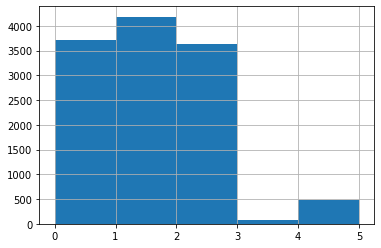

In [48]:
df['balcony'].hist(bins=5)

Вероятней всего пропуски это отсутствия балконов. Замена пропусков балконов на ноль.

In [49]:
df['balcony']=df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

#### Анализ пропусков в  `locality_name` категории населеных пунктах.

Так доля этих пропусков очень маленькая можно просто удалить их из данных

In [50]:
df = df.dropna(subset = ['locality_name'])
df['locality_name'].isna().sum()

0

#### Анализ  пропусков в категории - 'airports_nearest'

Обзор категории.

In [51]:
df['airports_nearest'].describe()

count    17984.000000
mean     28793.996108
std      12634.777618
min          0.000000
25%      18557.000000
50%      26750.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Просмотр населенных пунктов в которых есть пропуски в `airports_nearest`

In [52]:
list_location_nan_airport = df[df['airports_nearest'].isna()]['locality_name'].unique()
list_location_nan_airport

array(['городской поселок Янино-1', 'поселок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'поселок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'деревня Оржицы', 'деревня Кальтино', 'Кудрово',
       'поселок Романовка', 'п

Здесь большое количество маленьких населенных пунктов. Вероятно, расстояние до аэропорта не указано из-за большого расстояния.

Замена пропусков большим чем максимальное значение.

In [53]:
df['airports_nearest'] = df['airports_nearest'].fillna(90000)
df['airports_nearest'].isna().sum()

0

#### Анализ пропусков в `city_centers_nearest`

Обзор категории.

In [54]:
df['city_centers_nearest'].describe()

count    18007.000000
mean     14189.276004
std       8609.217524
min        181.000000
25%       9238.000000
50%      13094.000000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [55]:
df['city_centers_nearest'].isna().sum()

5462

In [56]:
df.query('locality_name == "Санкт-Петербург" and city_centers_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,10949000.0,68.00,2018-12-27T00:00:00,1,NaN,10.0,38.833052,6,2,...,NaN,0.0,Санкт-Петербург,90000.0,NaN,NaN,NaN,NaN,NaN,NaN
591,20,4200000.0,38.30,2019-04-16T00:00:00,1,2.60,16.0,19.800000,10,2,...,10.10,2.0,Санкт-Петербург,90000.0,NaN,NaN,NaN,NaN,NaN,NaN
602,11,9899000.0,101.00,2018-12-12T00:00:00,3,3.00,5.0,62.000000,3,2,...,15.00,0.0,Санкт-Петербург,90000.0,NaN,NaN,NaN,NaN,NaN,NaN
740,7,37000000.0,161.00,2016-05-22T00:00:00,3,NaN,9.0,84.000000,8,2,...,NaN,0.0,Санкт-Петербург,90000.0,NaN,NaN,NaN,NaN,NaN,402.0
793,19,7100000.0,59.60,2019-02-13T00:00:00,2,3.40,5.0,36.600000,2,2,...,12.50,0.0,Санкт-Петербург,90000.0,NaN,NaN,NaN,NaN,NaN,NaN
1333,12,18500000.0,66.00,2017-06-08T00:00:00,1,3.00,7.0,25.000000,7,2,...,35.00,1.0,Санкт-Петербург,90000.0,NaN,NaN,NaN,NaN,NaN,130.0
1869,13,3100000.0,32.00,2019-03-15T00:00:00,1,NaN,4.0,19.000000,2,0,...,5.00,0.0,Санкт-Петербург,90000.0,NaN,NaN,NaN,NaN,NaN,3.0
1892,12,9500000.0,130.00,2019-03-27T00:00:00,5,NaN,5.0,90.000000,2,2,...,15.00,0.0,Санкт-Петербург,90000.0,NaN,NaN,NaN,NaN,NaN,15.0
2361,17,4300000.0,32.60,2019-04-28T00:00:00,1,NaN,25.0,14.300000,17,2,...,8.10,0.0,Санкт-Петербург,90000.0,NaN,NaN,NaN,NaN,NaN,NaN
2702,14,5650000.0,51.00,2019-02-26T00:00:00,2,3.20,9.0,31.000000,5,2,...,10.00,0.0,Санкт-Петербург,90000.0,NaN,NaN,NaN,NaN,NaN,NaN


Удаление Санкт-Петербурга в выборке, так как его вес мал.

In [57]:
df = df.drop(index = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest.isna()').index)
df = df.reset_index(drop = True)

In [58]:
df.drop(index = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest.isna()').index)
df.query('locality_name == "Санкт-Петербург" and city_centers_nearest.isna()').locality_name.unique()
listIndex = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest.isna()').index
listIndex

Int64Index([], dtype='int64')

Список населенных пунктов с пропусками в `city_centers_nearest`

In [59]:
list_location_far_center = df[df['city_centers_nearest'].isna()]['locality_name'].unique()

Проверка на совпадение списков пропусков нахождения рядом аэропорта и расстояние от центра 

In [60]:
df.query('city_centers_nearest.isna()').query('locality_name not in @list_location_nan_airport')['locality_name'].unique()

array(['Пушкин'], dtype=object)

Так как населенные пункты маленькие расстояние от центра небольшое.

Просмотр характеристики расстояния от центра  населенных пунктов с пропусками `city_centers_nearest`

In [61]:
df.query('locality_name in @list_location_far_center')['city_centers_nearest'].describe()

count     1535.000000
mean     31480.554397
std       8998.726559
min      17012.000000
25%      26891.500000
50%      30358.000000
75%      32727.000000
max      61495.000000
Name: city_centers_nearest, dtype: float64

Замена пропусков медианным значением и проверка

In [62]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(
                df.query('locality_name in @list_location_far_center')['city_centers_nearest'].median())

df['city_centers_nearest'].isna().sum()

0

#### Анализ пропусков в `parks_around3000`

Возможно пропуски означают отсутствие парков.

Так как количество пропусков в `parks_around3000` практически  совпадает c `airports_nearest` это указывает на одинаковую причину пропусков.

Проверка на размеры населенного пункта

In [63]:
# проверка на совпадения 
len(df.query('parks_around3000.isna() and locality_name not in @list_location_nan_airport'))

0

В малых поселках отсутствуют парки или их наличие не влияет на цену объекта.

Замена пропусков нулем.

In [64]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'].isna().sum()

0

#### Анализ пропуков в расстоянии до парка `parks_nearest`.

Обзор категории

In [65]:
df['parks_nearest'].describe()

count    8004.000000
mean      490.556847
std       341.400133
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Количество населенных пунктов с пропусками в расстоянии от парка

In [66]:
len(df[df['parks_nearest'].isna()]['locality_name'].unique())

329

Количество населенных пунктов не входящих в список малых.

In [67]:
# столбец locality_name с пропусками в parks_nearest
nan_parks_nearest = df.query('parks_nearest.isna()').query('locality_name not in @list_location_nan_airport')
# уникальные locality_name с пропусками в parks_nearest
len(nan_parks_nearest['locality_name'].unique())

19

Медианное значение `parks_nearest` для всех мест кроме Санкт-Петербурга

In [68]:
median_parks_nearest_not_peter = df.query('locality_name != "Санкт-Петербург"')['parks_nearest'].median()
median_parks_nearest_not_peter

374.5

Замена пропусков

In [69]:
# замена пропусков 'parks_nearest' в крупных местах, на медианное значение городов кроме Санкт-Петербурга
nan_parks_nearest['parks_nearest']=nan_parks_nearest['parks_nearest'].fillna(median_parks_nearest_not_peter)
df['parks_nearest'] = df['parks_nearest'].fillna(nan_parks_nearest['parks_nearest'])

Так как в малых городах нет парков, или они  очень близко находиться к любым объектам и не влияют на цену объекта.  Заменим пропуски на максимальное значение.

In [70]:
df['parks_nearest'] = df['parks_nearest'].fillna(3200)
df['parks_nearest'].isna().sum()

0

#### Анализ пропусков `ponds_around3000`

Проверка на малые населенные пункты

In [71]:
df.query('ponds_around3000.isna()').query('locality_name not in @list_location_nan_airport')['locality_name'].unique()

array([], dtype=object)

Это очень малые населенные пункты, поэтому отсутствуют бассейны или их доступность для любого объекта в городе одинаковая.

Заполнение пропусков 0.

In [72]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'].isna().sum()

0

#### Анализ пропусков в категории `ponds_nearest`

Обзор характеристики.

In [73]:
df['ponds_nearest'].describe()

count    9006.000000
mean      518.611703
std       277.948834
min        13.000000
25%       294.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Проверка на малые населенные пункты.

In [74]:
list_unique_ponds_nearest = df.query('ponds_nearest.isna() and locality_name not in @list_location_nan_airport')['locality_name'].unique()
list_unique_ponds_nearest

array(['поселок Парголово', 'поселок Металлострой', 'Пушкин', 'Петергоф',
       'Сестрорецк', 'поселок Понтонный', 'Зеленогорск',
       'поселок Молодежное', 'поселок Стрельна', 'поселок Песочный',
       'поселок Репино', 'Павловск', 'поселок Лисий Нос',
       'поселок Левашово', 'поселок Усть-Ижора'], dtype=object)

Обзор этих населенных пунктов на наличие рядом бассейна

In [75]:
df.query('locality_name in @list_unique_ponds_nearest')['ponds_nearest'].describe()

count     568.000000
mean      493.357394
std       271.951166
min        22.000000
25%       267.000000
50%       460.500000
75%       669.250000
max      1344.000000
Name: ponds_nearest, dtype: float64

Замена на медианные значения этих населенных пунктов

In [76]:
serial_for_fillna = df.query('locality_name in @list_unique_ponds_nearest')['ponds_nearest'].fillna(
    df.query('locality_name in @list_unique_ponds_nearest')['ponds_nearest'].median())
df['ponds_nearest'] = df['ponds_nearest'].fillna(serial_for_fillna)

# остальное заменим на максимальное значение
df['ponds_nearest'] = df['ponds_nearest'].fillna(1344.000000)
df['ponds_nearest'].isna().sum()

0

#### Анализ пропусков в `days_exposition`.

Обзор категории

In [77]:
df['days_exposition'].describe().to_frame()

,days_exposition
count,20292.000000
mean,181.021437
std,219.956325
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


Срез пропусков по категории

In [78]:
df_nan_days_exposition = df.query('days_exposition.isna()')

<AxesSubplot:>

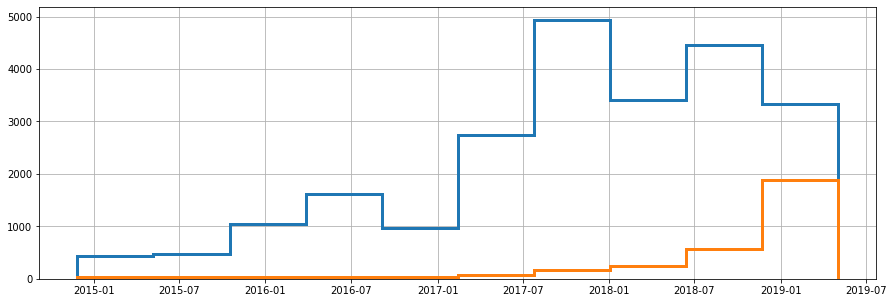

In [79]:
# преобразование даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# гистограмма для всего датаврейма
df['first_day_exposition'].hist(histtype = 'step',linewidth =3,figsize =(15,5))
# гистограмма для пропусков
df_nan_days_exposition['first_day_exposition'].hist(histtype = 'step', linewidth =3,figsize =(15,5))

Гистограмма пропусков смещена вправо во времени, что означает - перед выгрузкой не успели продать квартиры.

По этой причине оставим пропуски на своем месте 

<div class="alert alert-
            danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />мы искажаем наше среднее время продажи, если в данном параметре пропуск — квартира еще не продана, пропуски стоит оставить

    df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())
    
Из брифа

    Определите и изучите пропущенные значения:
    Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.

Проверка пропусков

In [80]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9030
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2178
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3117
dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23409 entries, 0 to 23408
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23409 non-null  int64         
 1   last_price            23409 non-null  float64       
 2   total_area            23409 non-null  float64       
 3   first_day_exposition  23409 non-null  datetime64[ns]
 4   rooms                 23409 non-null  int64         
 5   ceiling_height        14379 non-null  float64       
 6   floors_total          23409 non-null  float64       
 7   living_area           23409 non-null  float64       
 8   floor                 23409 non-null  int64         
 9   is_apartment          23409 non-null  int64         
 10  studio                23409 non-null  bool          
 11  open_plan             23409 non-null  bool          
 12  kitchen_area          21231 non-null  float64       
 13  balcony         

### Добавление новых столбцов

Добавление цены квадратного метра

In [82]:
df['price_of_meter'] = df['last_price'] / df['total_area']

In [83]:
df['last_price'].describe()

count    2.340900e+04
mean     6.526542e+06
std      1.088742e+07
min      4.300000e+05
25%      3.406000e+06
50%      4.650000e+06
75%      6.780000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Просмотр новой категории

In [84]:
df['price_of_meter'].describe()

count    2.340900e+04
mean     9.931949e+04
std      5.013839e+04
min      7.962963e+03
25%      7.662835e+04
50%      9.500000e+04
75%      1.141805e+05
max      1.907500e+06
Name: price_of_meter, dtype: float64

Добавление столбцов дня недели, месяца, года

In [85]:
df['day_of_week'] = df['first_day_exposition'].dt.day_name()

In [86]:
df['month'] = df['first_day_exposition'].dt.month

In [87]:
df['year'] = df['first_day_exposition'].dt.year

Добавление соотношения жилой площади к обшей.

In [88]:
df['ratio_living_squad'] = df['living_area'] / df['total_area']

Добавление доли кухни в площади всего объекта.

In [89]:
df['ratio_kitchen_squad'] = df['kitchen_area'] / df['total_area']

Добавление категорий этажности.

Функция для создания столбца категорий этажности.

In [90]:
# параметры функции два столбца общее количество этажей и этаж объекта 
# возвращает столбец с категориями - первый, последний, другой
def category_floor(total_floors, floor):
    list_floor_category = []
    for index  in  total_floors.index:
        if floor[index] == 1:
            list_floor_category.append('первый')   
        elif floor[index] == total_floors[index]:
            list_floor_category.append('последний')
        else:
            list_floor_category.append('другой')
    return list_floor_category

In [91]:
df['category_floor'] = category_floor(df['floors_total'], df['floor'])

In [92]:
# check

df['category_floor'].value_counts()

другой       17202
последний     3313
первый        2894
Name: category_floor, dtype: int64

### Преобразование столбцов

Перевод метры в километры в категории `city_centers_nearest`

In [93]:
df['city_centers_nearest'] = df['city_centers_nearest']*0.001
df = df.astype({'city_centers_nearest':'int'})

Округление потолков до десятых метра

In [94]:
df['ceiling_height'] = round(df['ceiling_height'],1)

## Структура предложенной на рынке недвижимости

Разделение объектов на две характерные группы - Санкт-Петербург и все остальные.

In [95]:
df_peterburg = df[df['locality_name']=='Санкт-Петербург']
df_others_location = df[df['locality_name']!='Санкт-Петербург']
len(df_others_location['locality_name'].unique())


328

###  Анализ цены

Обзор цены

In [96]:
df['last_price'].describe()

count    2.340900e+04
mean     6.526542e+06
std      1.088742e+07
min      4.300000e+05
25%      3.406000e+06
50%      4.650000e+06
75%      6.780000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Гистограммы для Санкт-Петербурга, области и всех объектов

<AxesSubplot:ylabel='Frequency'>

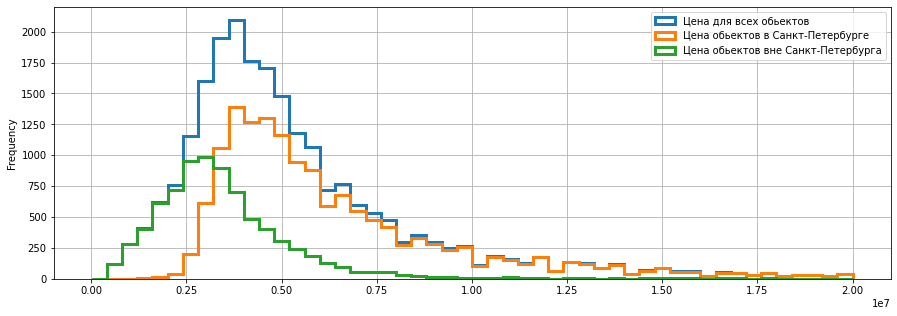

In [97]:
df['last_price'].plot(kind ='hist',bins=50,range = (10000,20000000), label='Цена для всех обьектов', legend =True,
                      grid=True,figsize =(15,5),histtype = 'step',linewidth=3)

df_peterburg['last_price'].plot(kind ='hist', bins=50,range = (10000,20000000), legend = True,histtype = 'step',
                                label='Цена обьектов в Санкт-Петербурге',grid=True,figsize =(15,5),linewidth =3)

df_others_location['last_price'].plot(kind ='hist', bins=50,range = (10000,20000000), legend = True,histtype = 'step',
                                label='Цена обьектов вне Санкт-Петербурга',grid=True,figsize =(15,5),linewidth =3)

Цена объектов в Петербурге ожидаемо выше чем по области. Так же  цена объектов в Санкт-Петербурге не так резко падает, как по области. Сказывается платежеспособное население в Санкт-Петербурге, которое больше чем в области.

### Площадь объектов

In [98]:
df['total_area'].describe()

count    23409.000000
mean        60.291698
std         35.537057
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Гистограмма площади для разной местности.

<AxesSubplot:ylabel='Frequency'>

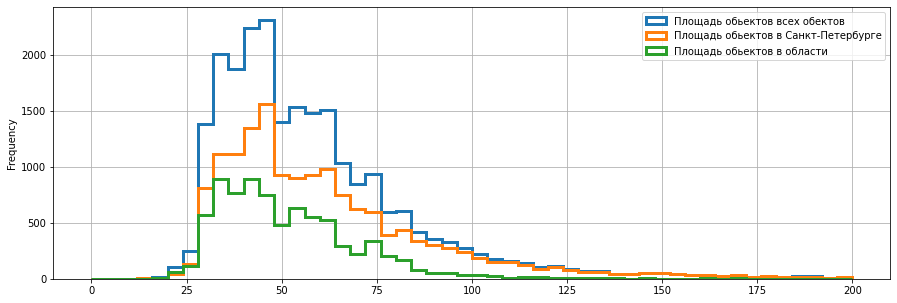

In [99]:
df['total_area'].plot(kind ='hist', bins=50,range = (0,200), legend = True,histtype = 'step',
                                label='Площадь обьектов всех обектов',grid=True,figsize =(15,5),linewidth =3)

df_peterburg['total_area'].plot(kind ='hist', bins=50,range = (0,200), legend = True,histtype = 'step',
                                label='Площадь обьектов в Санкт-Петербурге',grid=True,figsize =(15,5),linewidth =3)

df_others_location['total_area'].plot(kind ='hist', bins=50,range = (0,200), legend = True,histtype = 'step',
                                label='Площадь обьектов в области',grid=True,figsize =(15,5),linewidth =3)

В целом из-за большего количества новостроек в Санкт-Петербурге больше предложение объектов средней площади.

### Число комнат

Обзор категории.

In [100]:
df['rooms'].describe()

count    23409.000000
mean         2.071169
std          1.078265
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Гистограмма количества комнат для разной местности.

<AxesSubplot:ylabel='Frequency'>

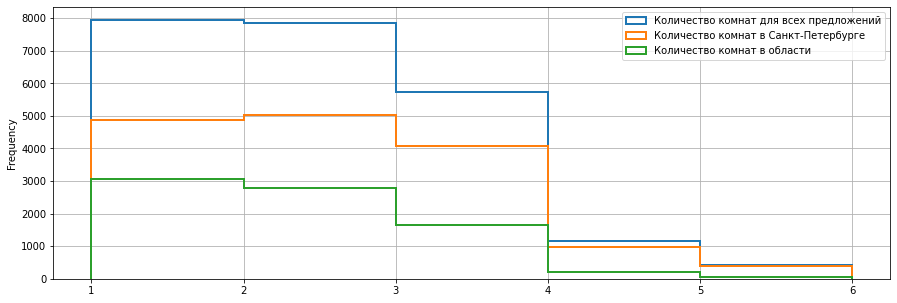

In [101]:
df['rooms'].plot(kind ='hist', bins=5,range = (1,6), legend = True,histtype = 'step',
                                label='Количество комнат для всех предложений',grid=True,figsize =(15,5),linewidth =2)

df_peterburg['rooms'].plot(kind ='hist', bins=5,range = (1,6), legend = True,histtype = 'step',
                                label='Количество комнат в Санкт-Петербурге',grid=True,figsize =(15,5),linewidth =2)

df_others_location['rooms'].plot(kind ='hist', bins=5,range = (1,6), legend = True,histtype = 'step',
                                label='Количество комнат в области',grid=True,figsize =(15,5),linewidth =2)

Вне Санкт-Петербурга больше однокомнатных объектов, что объясняет больше предложений объектов с меньшей площадью.

### Структура объектов по высоте потолков

Обзор категории

In [102]:
df['ceiling_height'].describe()

count    14379.000000
mean         2.732353
std          0.291857
min          2.200000
25%          2.500000
50%          2.600000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

Гистограмма потолков для разной местности

<AxesSubplot:ylabel='Frequency'>

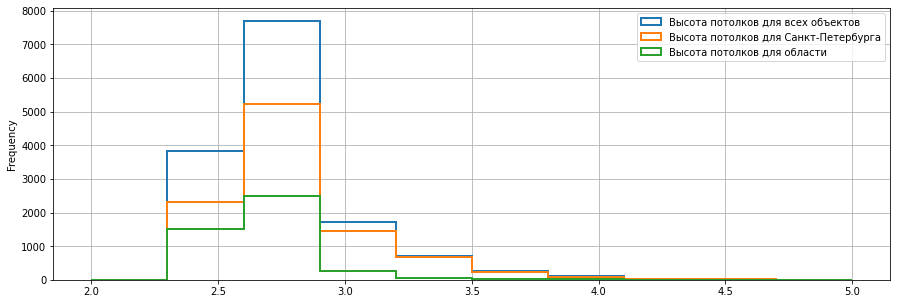

In [103]:
df['ceiling_height'].plot(kind ='hist', bins=10,range = (2,5), legend = True,histtype = 'step',
                                label='Высота потолков для всех объектов',grid=True,figsize =(15,5),linewidth =2)

df_peterburg['ceiling_height'].plot(kind ='hist', bins=10,range = (2,5), legend = True,histtype = 'step',
                                label='Высота потолков для Санкт-Петербурга',grid=True,figsize =(15,5),linewidth =2)

df_others_location['ceiling_height'].plot(kind ='hist', bins=10,range = (2,5), legend = True,histtype = 'step',
                                label='Высота потолков для области',grid=True,figsize =(15,5),linewidth =2)

Предложение объектов в области и в Петербурге очень похожи, с тенденцией в Санкт-Петербурге к высоким потолкам (больше 3 метров). Таких предложений в области очень мало. 

### Оценка времени продажи

Обзор категории.

In [104]:
df['days_exposition'].describe()

count    20292.000000
mean       181.021437
std        219.956325
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

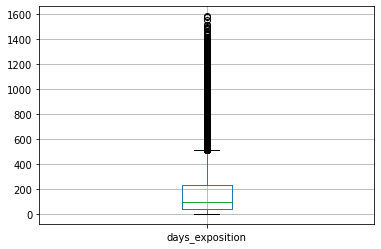

In [105]:
df.boxplot(['days_exposition'])

Около 400 дней необходимо для продажи большинства объектов.

<AxesSubplot:ylabel='Frequency'>

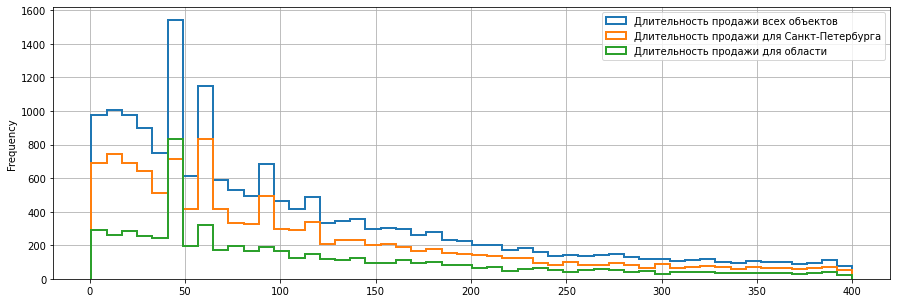

In [106]:
df['days_exposition'].plot(kind ='hist', bins=50,range = (1,400), legend = True,histtype = 'step',
                                label='Длительность продажи всех объектов',grid=True,figsize =(15,5),linewidth =2)

df_peterburg['days_exposition'].plot(kind ='hist', bins=50,range = (1,400), legend = True,histtype = 'step',
                                label='Длительность продажи для Санкт-Петербурга',grid=True,figsize =(15,5),linewidth =2)

df_others_location['days_exposition'].plot(kind ='hist', bins=50,range = (1,400), legend = True,histtype = 'step',
                                label='Длительность продажи для области',grid=True,figsize =(15,5),linewidth =2)

Характер длительности продаж практически не отличается в зависимости от локации.

### Ранжирование цены предложенной недвижимости по населенным пунктам

Десять городов с наиболее дорогой недвижимостью

<AxesSubplot:title={'center':'Цена квадратного метра'}, xlabel='locality_name'>

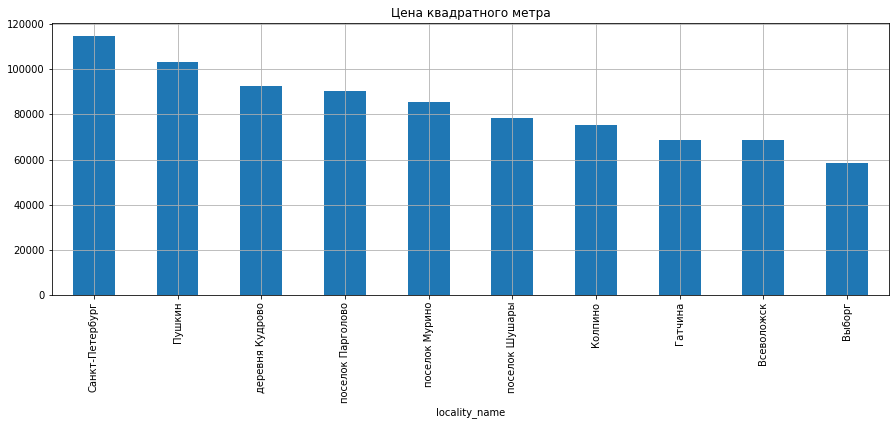

In [107]:
df_locality = df.pivot_table(index = 'locality_name', values ='price_of_meter',aggfunc = ['mean','count'])
df_locality.columns =['price_of_meter','sum_of_objects']
df_locality_good = df_locality.sort_values('sum_of_objects',ascending = False)[:10]
df_locality_good.sort_values('price_of_meter',ascending = False)['price_of_meter'].plot(kind='bar',grid=True,figsize=(15, 5),title = 'Цена квадратного метра')

In [108]:
print('Самый дорогой квадратный метр:',df_locality_good['price_of_meter'].max()) 

Самый дорогой квадратный метр: 114727.36498745983


Ожидаемо Санкт-Петербург имеет самую дорогую недвижимость.

In [109]:
print('Самый дешевый квадратный метр: ',df_locality_good['price_of_meter'].min())

Самый дешевый квадратный метр:  58238.143141139066


Цена квадратного метра в Выборге практически в 2 раза дешевле.

### Влияние на ценну объекта расстояние от центра

Обзор объектов в Санкт-Петербурге по расстоянию

In [110]:
df_peterburg_stat = df_peterburg.pivot_table(index='city_centers_nearest',values='price_of_meter',aggfunc=['median','count'])
df_peterburg_stat.columns = ['price_of_meter', 'count']
df_peterburg_stat

,price_of_meter,count
city_centers_nearest,,
0,138536.993745,86
1,123966.942149,239
2,116363.636364,307
3,110080.006872,522
4,125980.424144,903
5,125920.620114,766
6,134192.037471,469
7,125000.000000,406
8,114235.135671,660


В выборке присутствуют очень малочисленные объекты.

Построение графика зависимости цены от расстояния до центра в Петербурге

<AxesSubplot:xlabel='city_centers_nearest'>

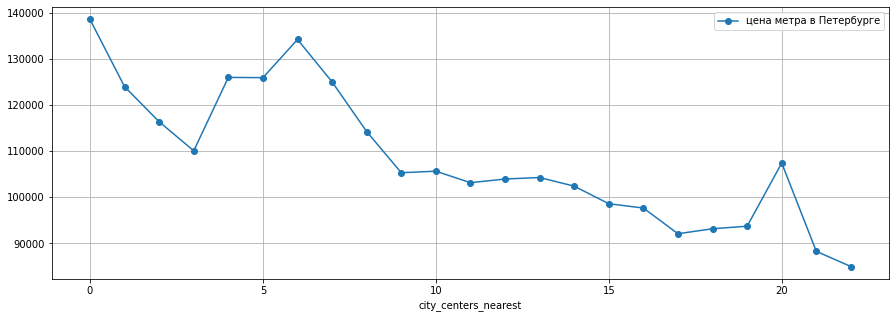

In [111]:
#Срез без малочисленных объектов
df_peterburg_stat.query('count > 70').plot(y = 'price_of_meter' ,grid = True, style ='-o',figsize = (15,5),label ='цена метра в Петербурге')

Цена квадратного метра падает, начиная с 6 километров и в дальнейшем не поднимаясь

Условный центр города имеет радиус в 6 километров

### Анализ объектов в центре Санкт-Петербурга 

Объекты в ценре города

In [112]:
df_peterburg_center = df_peterburg.query('city_centers_nearest <= 6')

#### Влияние на цену высоты потолков

Построение зависимости цены квадратного метра от высоты потолков в центре Петербурга

<AxesSubplot:title={'center':'центр Санкт-Петербурга'}, xlabel='ceiling_height'>

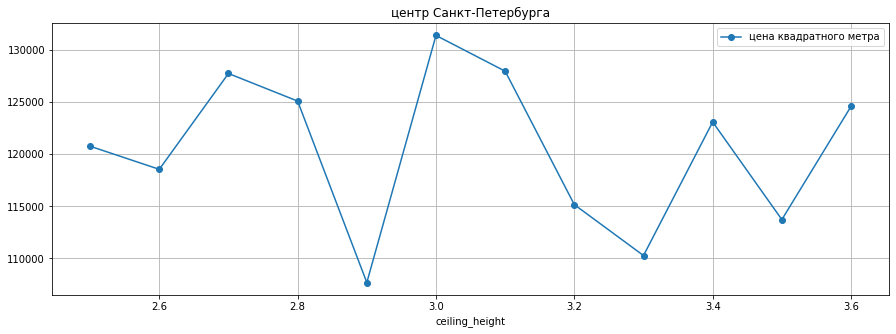

In [113]:
df_peterburg_center_ceiling = df_peterburg_center.pivot_table(index='ceiling_height', values ='price_of_meter',
                                aggfunc=['median','count'])
df_peterburg_center_ceiling.columns = ['price_of_meter','sum_of_objects']
df_peterburg_center_ceiling_good = df_peterburg_center_ceiling

# построение графика с по объектам которые есть в достаточном количестве
df_peterburg_center_ceiling_good.query('sum_of_objects > 50').sort_index(ascending =True).plot(
    y = 'price_of_meter' ,grid = True, style ='-o',figsize = (15,5),label ='цена квадратного метра',title='центр Санкт-Петербурга')

In [114]:
df_peterburg_center_ceiling_good.query('sum_of_objects > 50')['price_of_meter'].max()

131394.34037070075

Квартиры в центре высотой потолков в 3 метра являются самыми дорогими, за период с 2014 до 2019.

#### Влияние  площади  на цену

Округление площади до значений кратных 5.

In [115]:
# Отключение предупреждения
pd.options.mode.chained_assignment = None  # default='warn'

df_peterburg_center['total_area'] = (round(df_peterburg_center['total_area']/5)*5)

Построение графика зависимости  цены от площади

<AxesSubplot:xlabel='total_area'>

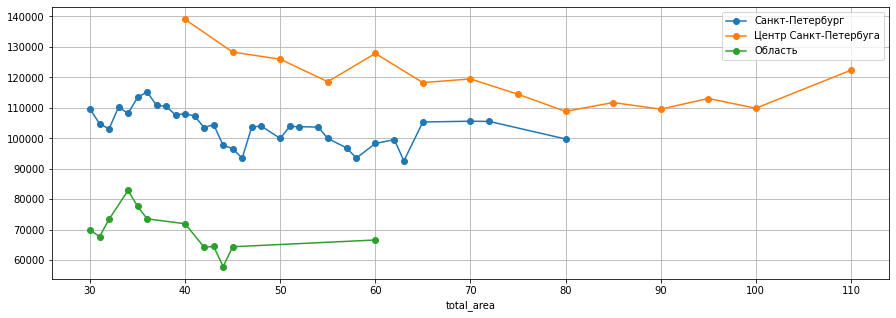

In [116]:
df_peterburg_total_area = df_peterburg.pivot_table(index='total_area', values ='price_of_meter',
                                aggfunc = ['median','count'])
df_peterburg_total_area.columns = ['price_of_meter','sum_of_objects']
df_peterburg_total_area.query('sum_of_objects > 100')['price_of_meter'].plot(
   style ='-o',figsize = (15,5),grid=True, legend =True, label = 'Санкт-Петербург')

df_peterburg_center_total_area = df_peterburg_center.pivot_table(index='total_area', values ='price_of_meter',
                                aggfunc = ['median','count'])
df_peterburg_center_total_area.columns = ['price_of_meter','sum_of_objects']
df_peterburg_center_total_area.query('sum_of_objects > 100')['price_of_meter'].plot(legend =True,
                                label = 'Центр Санкт-Петербуга', style ='-o',figsize = (15,5),grid=True)

df_others_location_total_area = df_others_location.pivot_table(index='total_area', values ='price_of_meter',
                                aggfunc = ['median','count'])
df_others_location_total_area.columns = ['price_of_meter','sum_of_objects']
df_others_location_total_area.query('sum_of_objects > 100')['price_of_meter'].plot(legend =True,label = 'Область',
   style ='-o',figsize = (15,5),grid=True)


Самым большим спросом пользуются квартиры площадью около 40 квадратных метров в центре. Дальше идет падение цены квадратного метра до 100 метров.

Цена метра растет в квартирах свыше 100 метров. Возможно, причина в том что от этой цифры начинается премиум сегмент.

Пик спроса смещается влево по мере удаления от центра

#### Влияние  количества комнат  на цену

Построение графика зависимости цены квадратного метра от числа комнат

<AxesSubplot:xlabel='rooms'>

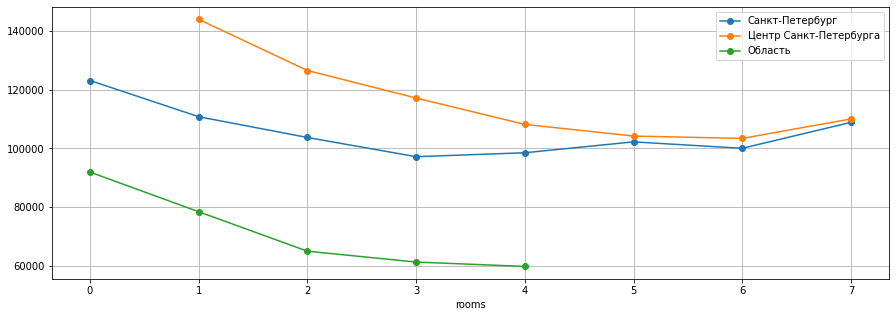

In [117]:
df_peterburg_rooms = df_peterburg.pivot_table(index='rooms', values ='price_of_meter',
                                aggfunc=['median','count'])
df_peterburg_rooms.columns = ['price_of_meter','sum_of_objects']
df_peterburg_rooms.query('sum_of_objects > 40')['price_of_meter'].plot(legend=True, label='Санкт-Петербург',
                                style ='-o',figsize = (15,5),grid=True)

df_peterburg_centerrooms = df_peterburg_center.pivot_table(index='rooms', values ='price_of_meter',
                                aggfunc=['median','count'])
df_peterburg_centerrooms.columns = ['price_of_meter','sum_of_objects']
df_peterburg_centerrooms.query('sum_of_objects > 40')['price_of_meter'].plot(legend=True, label='Центр Санкт-Петербурга',
                                style ='-o',figsize = (15,5),grid=True)

df_others_location_rooms = df_others_location.pivot_table(index='rooms', values ='price_of_meter',
                                aggfunc=['median','count'])
df_others_location_rooms.columns = ['price_of_meter','sum_of_objects']
df_others_location_rooms.query('sum_of_objects > 40')['price_of_meter'].plot(legend=True, label='Область',
                                style ='-o',figsize = (15,5),grid=True)


Цена метра в однокомнатных квартирах максимальная за счет высокого спроса на такие квартиры.

#### Влияние  этажа на цену

Построение графика зависимости цены квадратного метра от этажа на котором расположен объект

<AxesSubplot:title={'center':'Область'}, xlabel='category_floor'>

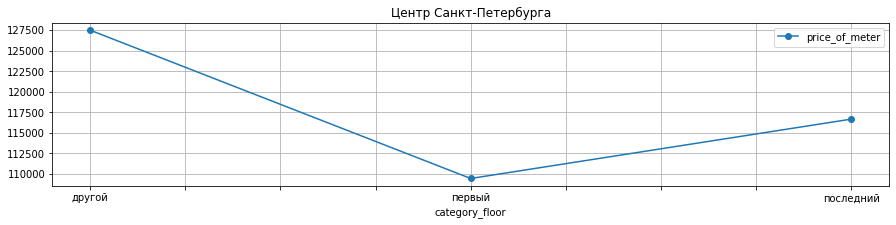

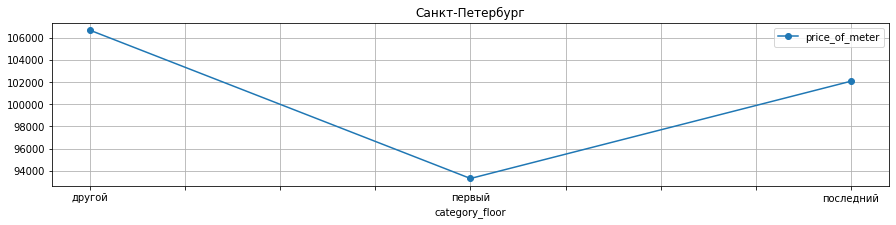

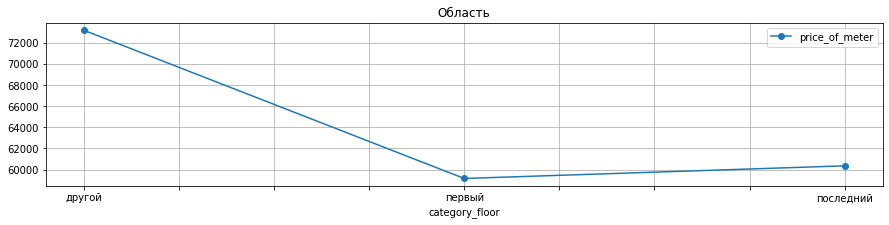

In [118]:
df_peterburg_center_floor = df_peterburg_center.pivot_table(index='category_floor', values ='price_of_meter',
                                aggfunc=['median','count'])
df_peterburg_center_floor.columns = ['price_of_meter','sum_of_objects']
df_peterburg_center_floor.plot(y='price_of_meter', style ='-o',figsize = (15,3),grid=True, title='Центр Санкт-Петербурга')

df_peterburg_floor = df_peterburg.pivot_table(index='category_floor', values ='price_of_meter',
                                aggfunc=['median','count'])
df_peterburg_floor.columns = ['price_of_meter','sum_of_objects']
df_peterburg_floor.plot(y='price_of_meter', style ='-o',figsize = (15,3),grid=True, title='Санкт-Петербург')

df_others_location_floor = df_others_location.pivot_table(index='category_floor', values ='price_of_meter',
                                aggfunc=['median','count'])
df_others_location_floor.columns = ['price_of_meter','sum_of_objects']
df_others_location_floor.plot(y='price_of_meter', style ='-o',figsize = (15,3),grid=True,title='Область')

<AxesSubplot:title={'center':'Разница между самым дорогим и самым дешевым этажем, %\n'}>

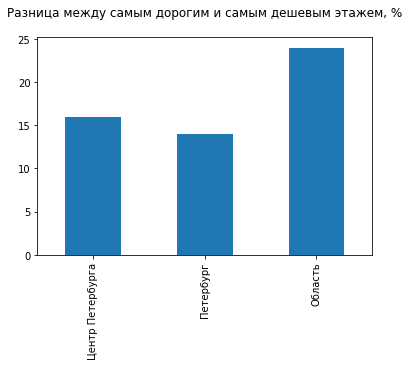

In [119]:
ratio_floor = pd.Series([df_peterburg_center_floor['price_of_meter'].max()/df_peterburg_center_floor['price_of_meter'].min(),
           df_peterburg_floor['price_of_meter'].max()/df_peterburg_floor['price_of_meter'].min(),
           df_others_location_floor['price_of_meter'].max()/df_others_location_floor['price_of_meter'].min()])
ratio_floor.index = ['Центр Петербурга','Петербург','Область']

ratio_floor = round((ratio_floor - 1)*100)
ratio_floor.plot(kind = 'bar',title = 'Разница между самым дорогим и самым дешевым этажем, %' + '\n')

Наибольшим образом этаж влияет на цену для жителей области

В центре Петербурга первый этаж представляет большую ценность, чем в остальном городе.

У жителей области не пользуются популярностью объекты расположенные на первых и последних этажах, что не так ярко выраженно для перербуржцев 

#### Влияние  даты размещения 

Частота размещения объявлений по годам.

<AxesSubplot:>

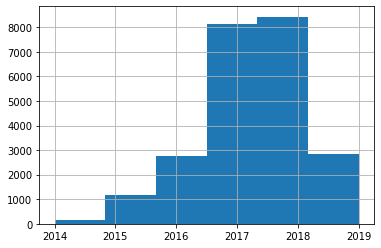

In [120]:
df['year'].hist(bins=6)

Объявлений 2014 года очень мало в дальнейшем это нужно учесть

##### Влияние  месяца размещения на цену

Объекты в центре Санкт-Петербурга

<AxesSubplot:title={'center':'Центр Санкт-Петербурга'}, xlabel='month'>

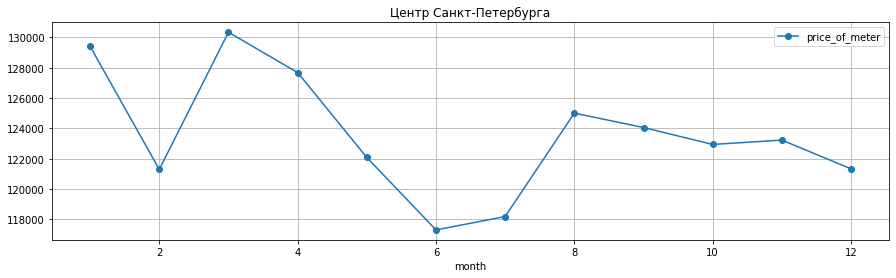

In [121]:
df_peterburg_center_month = df_peterburg_center.pivot_table(index='month', values ='price_of_meter',
                                aggfunc=['median','count'])
df_peterburg_center_month.columns = ['price_of_meter','sum_of_objects']
df_peterburg_center_month.plot(y='price_of_meter', style ='-o',figsize = (15,4),grid=True,title ='Центр Санкт-Петербурга')

Объекты в Петербурге

<AxesSubplot:title={'center':'Санкт-Петербург'}, xlabel='month'>

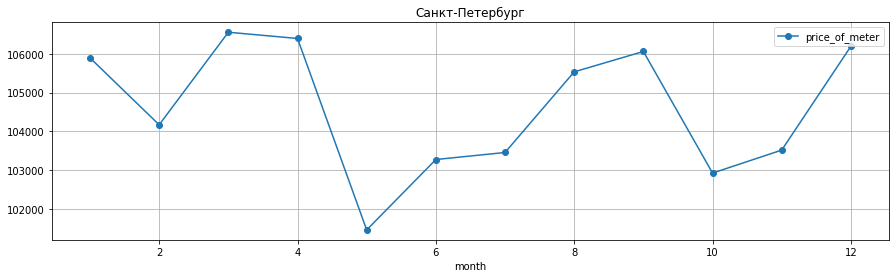

In [122]:
df_peterburg_month = df_peterburg.pivot_table(index='month', values ='price_of_meter',
                                aggfunc=['median','count'])
df_peterburg_month.columns = ['price_of_meter','sum_of_objects']
df_peterburg_month.query('sum_of_objects > 50').plot( y ='price_of_meter',style ='-o',
                                                     figsize = (15,4),grid=True,title ='Санкт-Петербург')

Цена в январе высокая, вероятно, по причине того, что собственники долго планировали  осуществить продажу и готовы ждать.

Цена начинает падать по мере приближения сезона отпусков в Санкт-Петербурге.

Когда лето заканчивается  деловая активность растет плюс эффект инфляции.

Жители области

<AxesSubplot:title={'center':'Область'}, xlabel='month'>

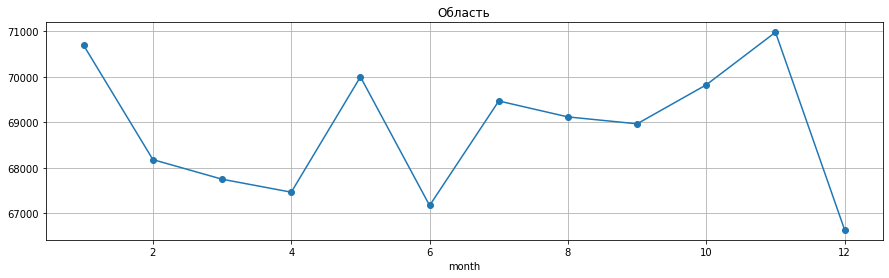

In [123]:
df_others_location_month = df_others_location.pivot_table(index='month', values ='price_of_meter',
                                aggfunc=['median','count'])
df_others_location_month.columns = ['price_of_meter','sum_of_objects']
df_others_location_month['price_of_meter'].plot( y ='price_of_meter',style ='-o',figsize = (15,4),grid=True, title ='Область')


Предложения квартир в области отличаются  высокими ценами в мае, что сильно контрастирует с Петербургом.

##### Влияние  дня размещения на цену

In [124]:
index_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
from sklearn import preprocessing

<AxesSubplot:xlabel='day_of_week'>

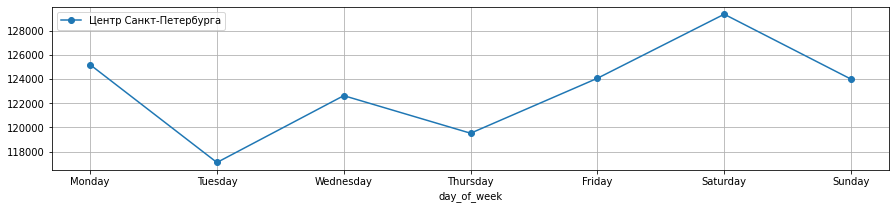

In [125]:

df_peterburg_center_day = df_peterburg_center.query('year < 2019').pivot_table(index='day_of_week', values ='price_of_meter',
                                aggfunc=['median','count'])
df_peterburg_center_day.columns = ['price_of_meter','sum_of_objects']

df_peterburg_center_day.reindex(index_day).plot(
    y='price_of_meter', style ='-o',figsize = (15,3),grid=True,label = 'Центр Санкт-Петербурга')


<AxesSubplot:xlabel='day_of_week'>

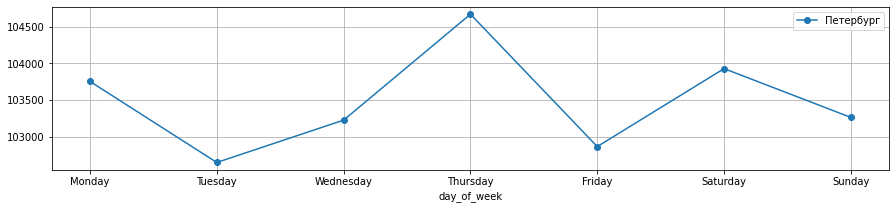

In [126]:
df_peterburg_day = df_peterburg.query('year < 2019').pivot_table(index='day_of_week', values ='price_of_meter',
                                aggfunc=['median','count'])
df_peterburg_day.columns = ['price_of_meter','sum_of_objects']
df_peterburg_day['price_of_meter'].reindex(index_day).plot( style ='-o',figsize = (15,3),grid=True, label = 'Петербург', legend = True)


<AxesSubplot:xlabel='day_of_week'>

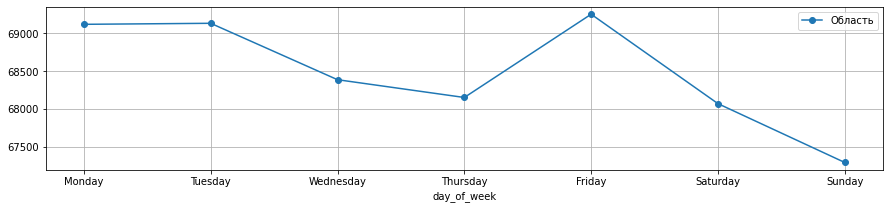

In [127]:
df_others_locations_day = df_others_location.query('year < 2019').pivot_table(index='day_of_week', values ='price_of_meter',
                                aggfunc=['median','count'])
df_others_locations_day.columns = ['price_of_meter','sum_of_objects']
df_others_locations_day['price_of_meter'].reindex(index_day).plot(style ='-o',
                                                                  figsize = (15,3),grid=True, label = 'Область', legend = True)


Нормированный вид, где 1 максимальная цена для своей локации

<AxesSubplot:xlabel='day_of_week'>

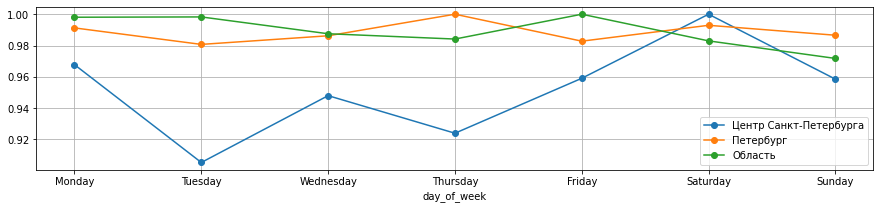

In [128]:
df_peterburg_center_day['price_of_meter'] = df_peterburg_center_day['price_of_meter']/df_peterburg_center_day['price_of_meter'].max()
df_peterburg_center_day.reindex(index_day).plot(
    y='price_of_meter', style ='-o',figsize = (15,3),grid=True,label = 'Центр Санкт-Петербурга')

df_peterburg_day['price_of_meter'] = df_peterburg_day['price_of_meter']/df_peterburg_day['price_of_meter'].max()
df_peterburg_day['price_of_meter'].reindex(index_day).plot( style ='-o',figsize = (15,3),grid=True, label = 'Петербург', legend = True)

df_others_locations_day['price_of_meter'] = df_others_locations_day['price_of_meter']/df_others_locations_day['price_of_meter'].max()
df_others_locations_day['price_of_meter'].reindex(index_day).plot(style ='-o',
                                                                  figsize = (15,3),grid=True, label = 'Область', legend = True)

Объявления размещенные во вторник имеют самые низкие цены для Петербурга, но в области эта особенность не работает.

В целом видна большая зависимость объектов в области от дня размещения, чем для Петербурга  

#####  Влияние месяца объявления на длительность продажи

Гистограммы объектов

<AxesSubplot:xlabel='month'>

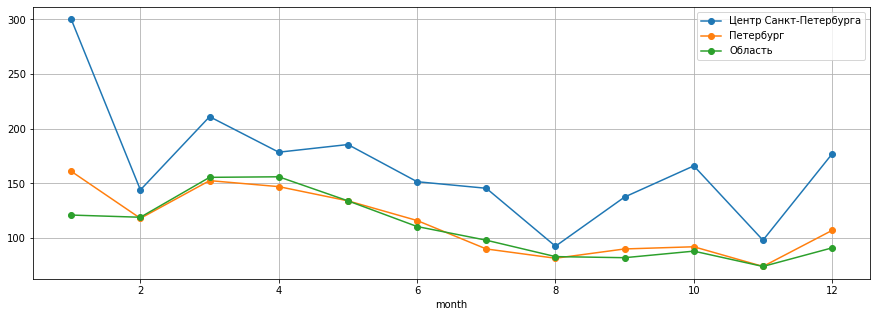

In [129]:
df_peterburg_center_month = df_peterburg_center.query('year < 2019').pivot_table(index='month', values ='days_exposition',
                                aggfunc=['median','count'])
df_peterburg_center_month.columns = ['days_exposition','sum_of_objects']
df_peterburg_center_month.plot(y='days_exposition', style ='-o',figsize = (15,5),grid=True,label = 'Центр Санкт-Петербурга')

df_peterburg_month = df_peterburg.query('year < 2019').pivot_table(index='month', values ='days_exposition',
                                aggfunc=['median','count'])
df_peterburg_month.columns = ['days_exposition','sum_of_objects']
df_peterburg_month['days_exposition'].plot( style ='-o',figsize = (15,5),grid=True, label = 'Петербург', legend = True)

df_others_locations_month = df_others_location.query('year < 2019').pivot_table(index='month', values ='days_exposition',
                                aggfunc=['median','count'])
df_others_locations_month.columns = ['days_exposition','sum_of_objects']
df_others_locations_month['days_exposition'].plot( style ='-o',figsize = (15,5),grid=True, label = 'Область', legend = True)

Собственники в январе ставят высокие цены, что приводит к длительной продаже объектов из-за высокой цены.

#### Зависимость цены от года размещения

<AxesSubplot:xlabel='year'>

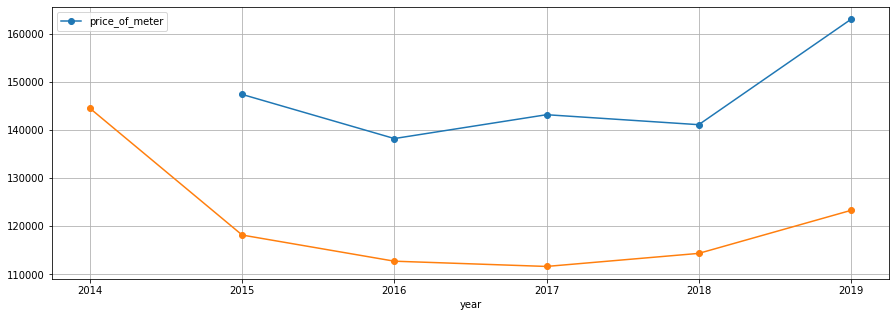

In [130]:
df_peterburg_center_year = df_peterburg_center.pivot_table(index='year', values ='price_of_meter',
                                aggfunc=['mean','count'])
df_peterburg_center_year.columns = ['price_of_meter','sum_of_objects']
df_peterburg_center_year.query('sum_of_objects > 50').plot(y='price_of_meter', style ='-o',figsize = (15,5),grid=True)
df_peterburg_center_year

df_peterburg_year = df_peterburg.pivot_table(index='year', values ='price_of_meter',
                                aggfunc=['mean','count'])
df_peterburg_year.columns = ['price_of_meter','sum_of_objects']
df_peterburg_year.query('sum_of_objects > 50')['price_of_meter'].plot( style ='-o',figsize = (15,5),grid=True)


Самые низкие цены в кризис 2015-2016 года. В центре недвижимость начала расти раньше

,price_of_meter,sum_of_objects
year,,
2014,70185.456765,37
2015,69706.402652,323
2016,68243.998311,900
2017,68367.531492,2640
2018,69072.423449,3095
2019,70041.397105,872


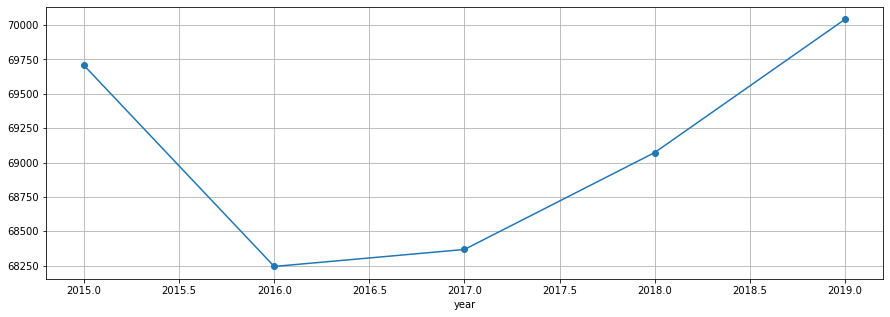

In [131]:
df_others_location_year = df_others_location.pivot_table(index='year', values ='price_of_meter',
                                aggfunc=['mean','count'])
df_others_location_year.columns = ['price_of_meter','sum_of_objects']
df_others_location_year.query('sum_of_objects > 50')['price_of_meter'].plot( style ='-o',figsize = (15,5),grid=True)
df_others_location_year

Провал 2015-2016 годов объясняется кризисом, затем идет восстановление

In [132]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    df_peterburg[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"15,542.00","15,542.00","10,028.00","13,513.00","15,542.00","15,542.00","14,224.00","15,542.00","15,542.00"
min,0.00,12.00,2.30,1.00,"1,190,000.00",2.00,1.30,1.00,1.00
max,19.00,900.00,8.30,"1,572.00","763,000,000.00",409.70,112.00,33.00,52.00


In [133]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    df_peterburg_center[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"3,292.00","3,292.00","2,156.00","2,740.00","3,292.00","3,292.00","2,979.00","3,292.00","3,292.00"
min,0.00,10.00,2.40,3.00,"1,600,000.00",2.00,2.00,1.00,2.00
max,19.00,630.00,6.00,"1,572.00","763,000,000.00",409.00,107.00,25.00,25.00


In [134]:
# check
df_peterburg_center.rooms.value_counts().to_frame()

,rooms
3,1011
2,959
1,473
4,465
5,213
6,81
7,54
0,15
8,10
9,3


In [135]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    df_others_location[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"7,867.00","7,867.00","4,351.00","6,779.00","7,867.00","7,867.00","7,007.00","7,867.00","7,867.00"
min,0.00,15.00,2.20,3.00,"430,000.00",2.00,2.30,1.00,1.00
max,8.00,380.00,8.00,"1,580.00","42,000,000.00",239.40,64.00,27.00,60.00


 ## Выводы 

Ключевые характеристики недвижимости

In [136]:
data = {'медианная цена метра':[df_peterburg['price_of_meter'].median(),
                           df_peterburg_center['price_of_meter'].median(),
                          df_others_location['price_of_meter'].median()],
        'медианная площадь':[df_peterburg['total_area'].median(),
                      df_peterburg_center['total_area'].median(),
                      df_others_location['total_area'].median()],
        # уберем 2019 так как там было основное количество пропусков
        'медианное время до продажи':[df_peterburg['days_exposition'].median(),
                           df_peterburg_center['days_exposition'].median(),
                          df_others_location['days_exposition'].median()],
        'среднее количество комнат':[df_peterburg['rooms'].mean(),
                           df_peterburg_center['rooms'].mean(),
                          df_others_location['rooms'].mean()],
        'средняя высота потолков':[df_peterburg['ceiling_height'].mean(),
                           df_peterburg_center['ceiling_height'].mean(),
                          df_others_location['ceiling_height'].mean()],
        }

total_table = pd.DataFrame(data, index = ['Санкт-Петербург','Центр Санкт-Петербурга','Область'])
total_table

,медианная цена метра,медианная площадь,медианное время до продажи,среднее количество комнат,средняя высота потолков
Санкт-Петербург,104761.904762,55.0,95.0,2.172886,2.768369
Центр Санкт-Петербурга,123513.704547,80.0,142.0,2.863305,3.112848
Область,68750.000000,47.0,96.0,1.870217,2.649345


# Нахождение коэффициента корреляции

Санкт-Петербург

In [137]:
df_peterburg.query('city_centers_nearest<40')[['last_price', 'total_area', 'city_centers_nearest', 'rooms', 'ceiling_height']].corr()

,last_price,total_area,city_centers_nearest,rooms,ceiling_height
last_price,1.000000,0.655122,-0.259670,0.371070,0.373457
total_area,0.655122,1.000000,-0.338816,0.758922,0.475211
city_centers_nearest,-0.259670,-0.338816,1.000000,-0.295340,-0.532061
rooms,0.371070,0.758922,-0.295340,1.000000,0.316510
ceiling_height,0.373457,0.475211,-0.532061,0.316510,1.000000


Центр Санкт-Петербурга

In [138]:
df_peterburg_center[['last_price', 'total_area', 'city_centers_nearest', 'rooms', 'ceiling_height']].corr()

,last_price,total_area,city_centers_nearest,rooms,ceiling_height
last_price,1.000000,0.607940,-0.047198,0.309503,0.257905
total_area,0.607940,1.000000,-0.081226,0.727615,0.351084
city_centers_nearest,-0.047198,-0.081226,1.000000,-0.162886,-0.214803
rooms,0.309503,0.727615,-0.162886,1.000000,0.267975
ceiling_height,0.257905,0.351084,-0.214803,0.267975,1.000000


Область

In [139]:
df_others_location[['last_price', 'total_area', 'city_centers_nearest', 'rooms', 'ceiling_height']].corr()

,last_price,total_area,city_centers_nearest,rooms,ceiling_height
last_price,1.000000,0.718406,-0.004533,0.411985,0.301790
total_area,0.718406,1.000000,0.021402,0.780728,0.222625
city_centers_nearest,-0.004533,0.021402,1.000000,0.078550,0.016594
rooms,0.411985,0.780728,0.078550,1.000000,0.027176
ceiling_height,0.301790,0.222625,0.016594,0.027176,1.000000


Расстояние от центра значительно влияет на цену объекта только в Петербурге.

В области влияние общей площади на цену более существенное, 
чем ближе к центру Санкт-Петербурга тем объекты более габаритные, такой тенденции нет в области

# Диаграмма рассеяния при помощи библиотеки сиборн

In [140]:
import seaborn as sns

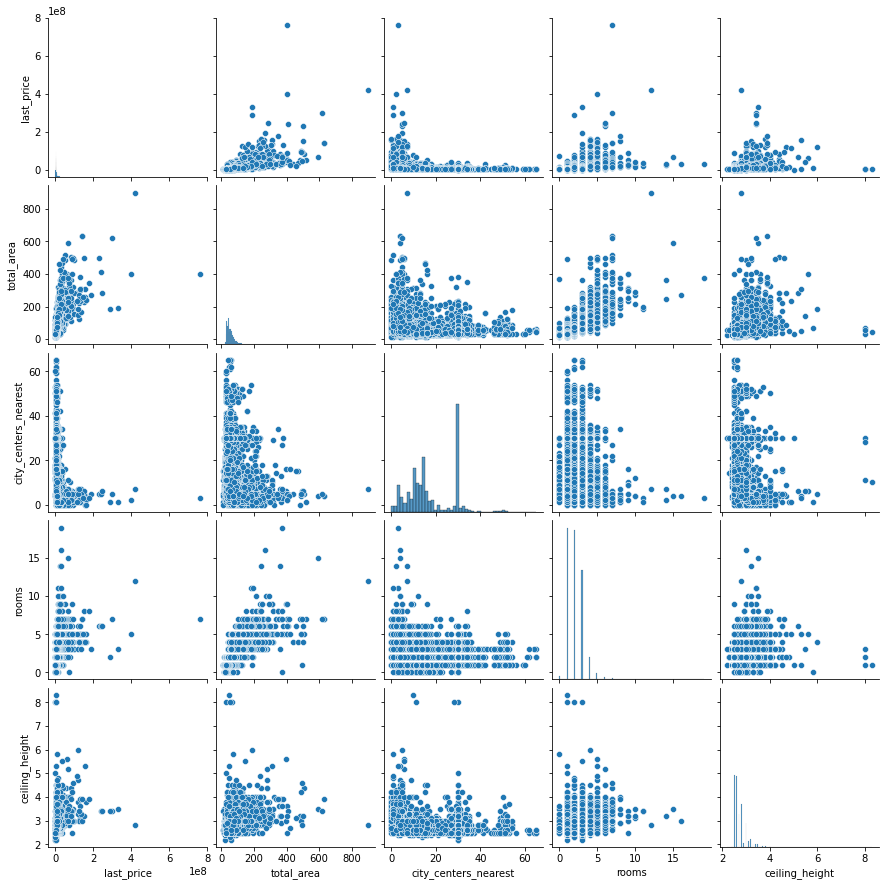

In [141]:
sns.pairplot(df[['last_price', 'total_area', 'city_centers_nearest', 'rooms', 'ceiling_height']]);

Основные выводы:
* Существует тенденция к увеличению площади и количества комнат объектов  недвижимости по мере удаления от центра Санкт-Петербурга
* Первый и последний этаж для жителей Санкт-Петербурга являются более привлекательными объектами, в отличии от людей проживающих в небольших населенных пунктах
* Условный центр Санкт-Петербурга имеет радиус 6 километров, внутри которого цены не сильно зависят от расстояния до центра. За пределом 6 километров начинает сказываться отдаленность.
* В начале года цена на недвижимость высокая. К началу лета возникает некоторый спад цены в Петербурге. Затем по мере приближения осени цена вновь растет. Для покупки жилья в Петербурге лучшим временем является сезон отпусков. Но май не лучшее время для приобретения квартиры в области
* Длительность продажи объектов  практически не зависит от локации. Небольшое увеличение времени продажи в центре объясняется более дорогой недвижимостью.
